# Credit Card Fraud Detection

## Introduction

Credit Card Frauds are the cases of using someone else's credit cards for financial transactions without the information of the card owner. Credit Cards were made available inorder for the people to increase their buying power, it is an agreement with your bank that lets the user use the money lended by the bank in exchange for the repayment of this lended money on the due date or incur interest charges. With the rise in the e-commerce and the recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. As all the things in the nature are binary, cases of credit card frauds has also achieved high numbers.
Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!



## Literature Review 

- It is essential for credit card companies to establish credit card transactions that
fraudulent from transactions that are non-fraudulent, so that their customers’ accounts
won’t get affected and charged for products that the customers didn’t buy (Maniraj et al.,
2019). There are many financial Companies and institutions that lose massive amounts
of money because of fraud and fraudsters that are seeking different approaches
continuously to violate the rules and commit illegal actions; therefore, systems of fraud
detection are essential for all banks that issue credit cards to decrease their losses
(Zareapoor et al., 2012). There are multiple methods used to detect fraudulent behaviors
such as Neural Network (NN), Decision Trees, K-Nearest Neighbor algorithms, and
Support Vector Machines (SVM). Those ML methods can either be applied independently
or can be used collectively with the addition of ensemble or meta-learning techniques to
develop classifiers (Zareapoor et al., 2012). 

- Zareapoor and his research team used multiple techniques to determine the best
performing model in detecting fraudulent transactions, which was established using the
accuracy of the model, the speed in detecting and the cost. The models used were Neural
Network, Bayesian Network, SVM, KNN and more. The comparison table provided in the
research paper showed that Bayesian Network was very fast in finding the transactions
that are fraudulent, with high accuracy. The NN performed well as well as the detection
was fast, with a medium accuracy. KNN’s speed was good with a medium accuracy, and
finally SVM scored one of the lower scores, as the speed was low, and the accuracy was
medium. As for the cost All models built were expansive (Zareapoor et al., 2012).

- Manirajs team built a model that can recognize if any new transaction is fraud or nonfraud, their goal was to get 100% in the detection of fraudulent transactions in addition to
trying to minimize the incorrectly classified fraud instances. Their model has performed
well as they were able to get 99.7% of the fraudulent transactions (Maniraj et al., 2019).

- Sahin and Duman used four Support Vector Machine methods in detecting credit card
fraud. (SVM) Support Vector Machine with RBF, Polynomial, Sigmoid, and Linear Kernel,
all models scored 99.87% in the training model and 83.02% in the testing part of the
model (Sahin & Duman, 2011).

## Aim 
- To classify whether a credit card transaction is fradulent or genuine and handle unbalanced dataset.
- It is a binary classification problem with highly unbalanced data.

## Dataset Information

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Importing libraries and exploring the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the data

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


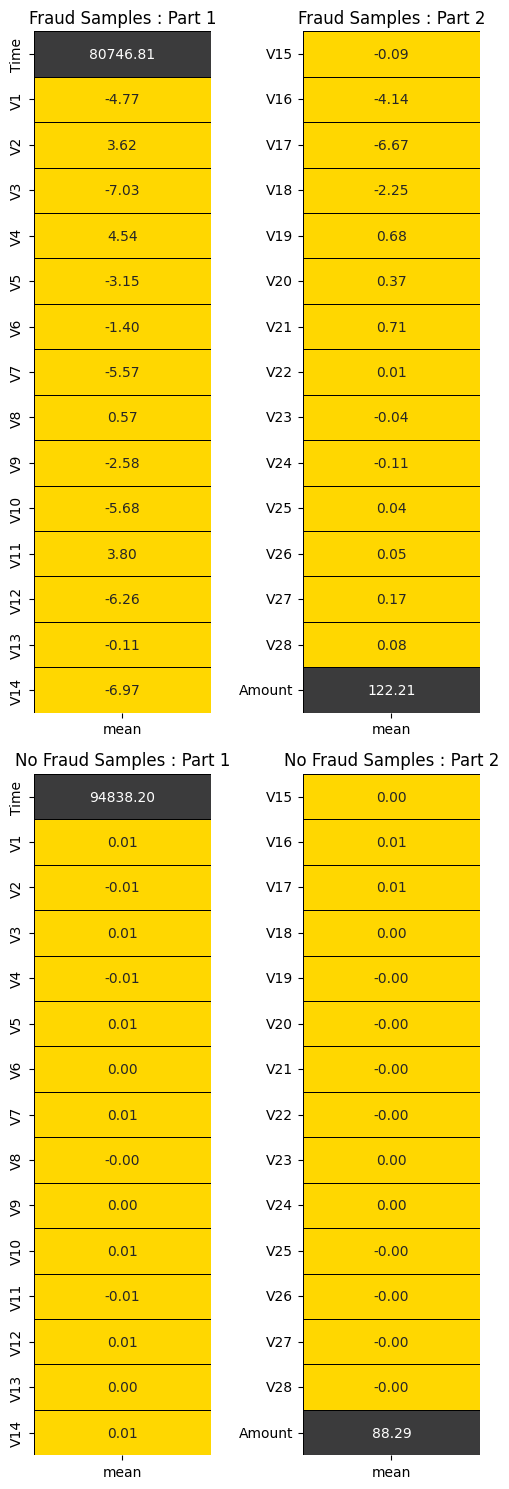

In [5]:
fraud = df[df['Class'] == 1].describe().T
nofraud = df[df['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

- Mean values of features for Fraud & No Fraud cases!
- For No Fraud cases, V1 - V28 mean values are almost 0 for all the cases. Mean Amount, 88.29, is less than the mean transaction amount, 122.21, of the Fraud cases.
- Time taken for No Fraud transactions is more than those for Fraud transactions.
- These could be some of the indicators for detecting fraud transactions.

In [6]:
#checking the missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No null values are present

# Exploratory Data Analysis

Distribuition of legit(0) and Frauds(1): 
Class
0    284315
1       492
Name: count, dtype: int64


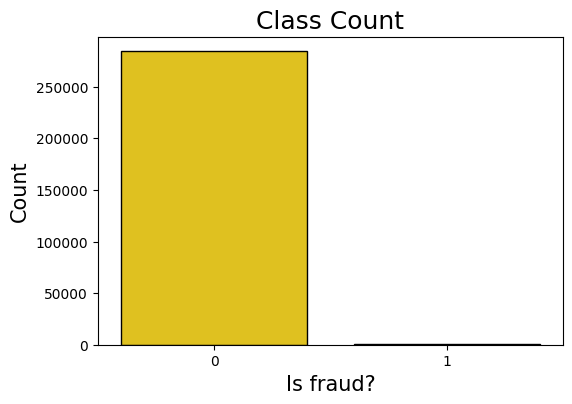

In [7]:
# Distribution of legit transactions & fraudulent transactions

print("Distribuition of legit(0) and Frauds(1): ")
print(df["Class"].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class',edgecolor = 'black',palette = colors)

plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


- Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, No Fraud.- 
- Hence, data balancing becomes a crucial part in building a robust model.

In [8]:
#Time Features 
#As our Time feature are in seconds we will transform it to minutes and hours to get a better understand of the patterns

timedelta = pd.to_timedelta(df['Time'] , unit = 's')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

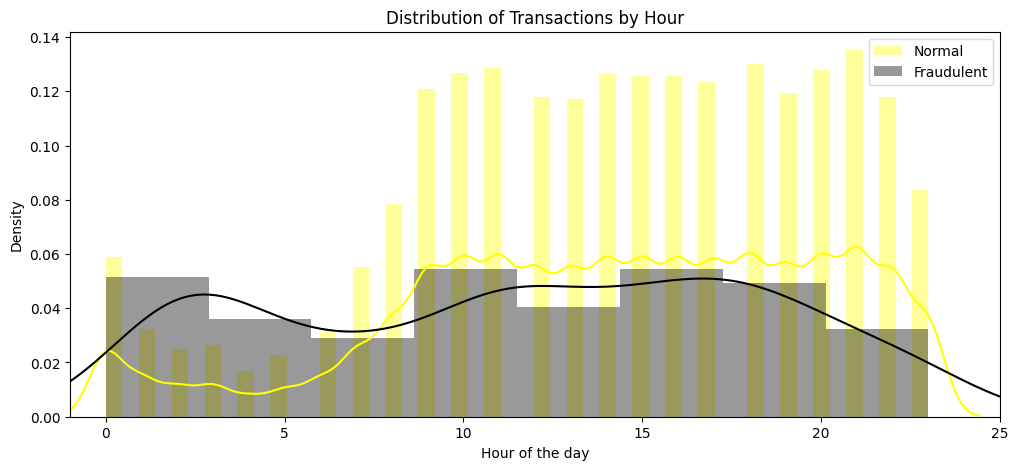

In [9]:
#Exploring the distribuition by Class types throught hours

plt.figure(figsize=(12, 5))
sns.distplot(df[df['Class'] == 0]['Time_hour'], color='yellow', label='Normal')
sns.distplot(df[df['Class'] == 1]['Time_hour'], color='black', label='Fraudulent')
plt.title('Distribution of Transactions by Hour')
plt.xlim(-1, 25)
plt.xlabel('Hour of the day')
plt.ylabel('Density')
plt.legend()
plt.show()


- The plot shows the distribution of transactions by hour of the day, providing insight into when transactions are most frequent.
-  The yellow curve represents the distribution of normal transactions. Peaks and valleys in this curve indicate the hours when normal transactions are most and least common, respectively.
- The black curve represents the distribution of fraudulent transactions. Peaks and valleys in this curve indicate the hours when fraudulent transactions are most and least common, respectively.


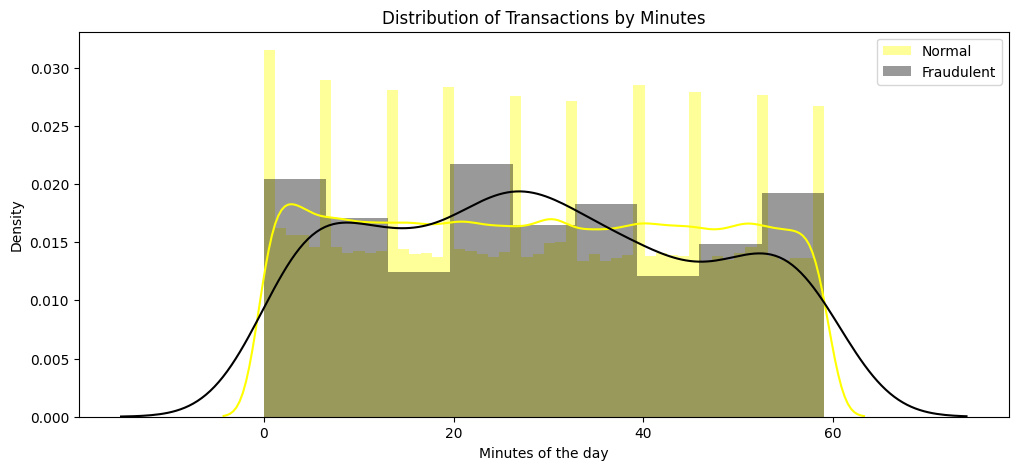

In [10]:
#Exploring the distribuition by Class types throught minutes

plt.figure(figsize=(12, 5))
sns.distplot(df[df['Class'] == 0]['Time_min'], color='yellow', label='Normal')
sns.distplot(df[df['Class'] == 1]['Time_min'], color='black', label='Fraudulent')
plt.title('Distribution of Transactions by Minutes')
plt.xlabel('Minutes of the day')
plt.ylabel('Density')
plt.legend()
plt.show()

- The plot shows the distribution of transactions throughout the day, broken down into minutes. It provides insights into the frequency of transactions at different minutes of the day.
- Peaks in the distribution of fraudulent transactions at specific minutes may suggest that fraudsters are more active during those times. This information can help in implementing targeted fraud prevention measures during peak minutes of fraudulent activity.

# Feature Engineering

In [11]:
#Feature engineering to a better visualization of the values

df['Amount_log'] = np.log(df.Amount + 0.01)
#This transformation is commonly used to make the distribution of a variable more symmetric or to reduce the influence of extreme values (outliers) in the data.


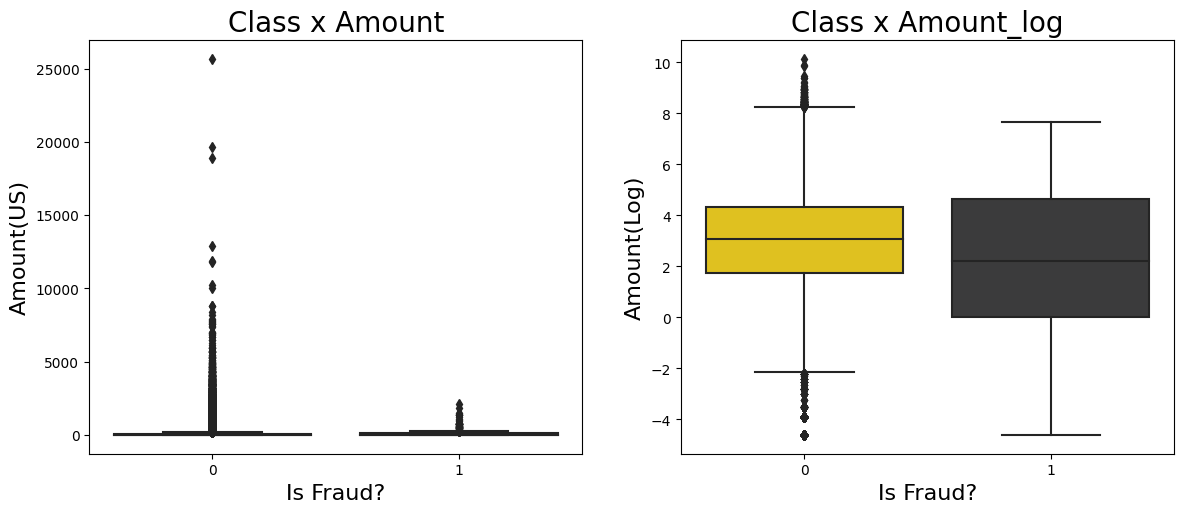

In [42]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",data=df , palette = colors)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df , palette = colors )
ax1.set_title("Class x Amount_log", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8) #to adjust vertical spacing

plt.show()

- We can see a slightly difference in log amount of our two Classes.
- The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values
- Overall, the 'Amount_log' column resulting from this transformation is likely to have a more symmetric distribution, reduced skewness, and less influence from outliers compared to the original 'Amount' column. This can lead to better performance in statistical modeling, visualization, and analysis tasks.

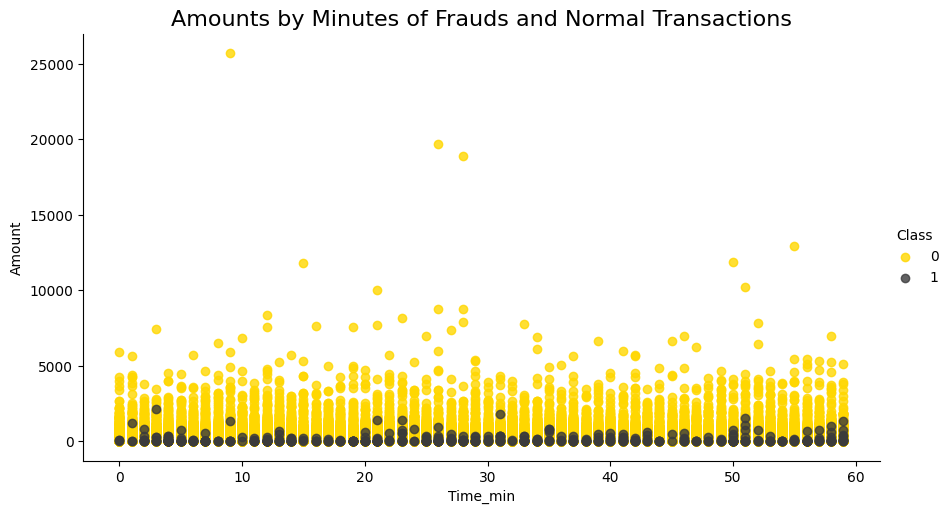

In [13]:
#Looking the Amount and minute distribuition of FRAUD transactions

ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class' , palette = colors)
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

-  The scatter plot visualizes the relationship between transaction amounts and the minutes of the day for fraudulent transactions.
- Examining the distribution of fraudulent transactions across different times of the day and transaction amounts may reveal patterns or anomalies that can aid in fraud detection.

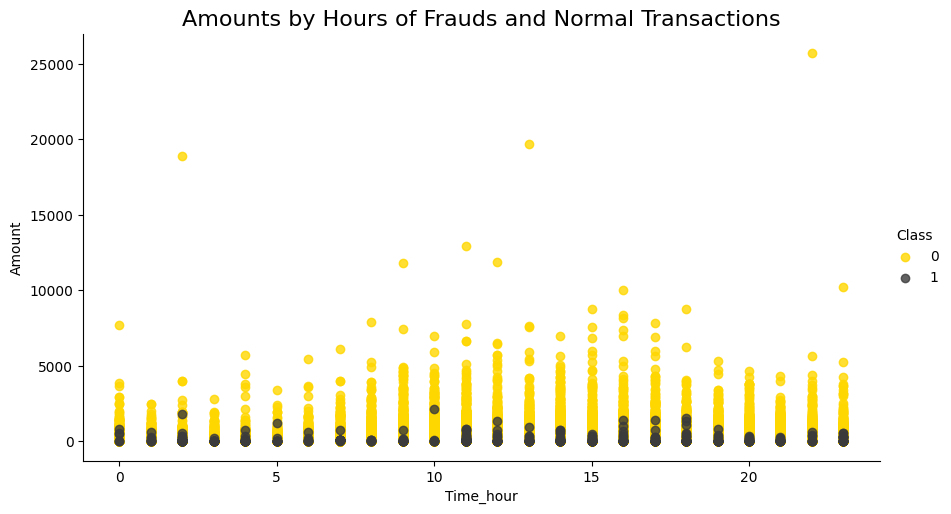

In [14]:
#Looking the Amount and hour distribuition of FRAUD transactions

ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class' , palette = colors)
plt.title("Amounts by Hours of Frauds and Normal Transactions",fontsize=16)
plt.show()

- The scatter plot visualizes the relationship between transaction amounts and the hour of the day for fraudulent transactions.
- By examining where fraudulent transactions are concentrated during different hours of the day, we can identify peak hours of fraudulent activity. This information can help in implementing targeted fraud prevention measures during peak hours.

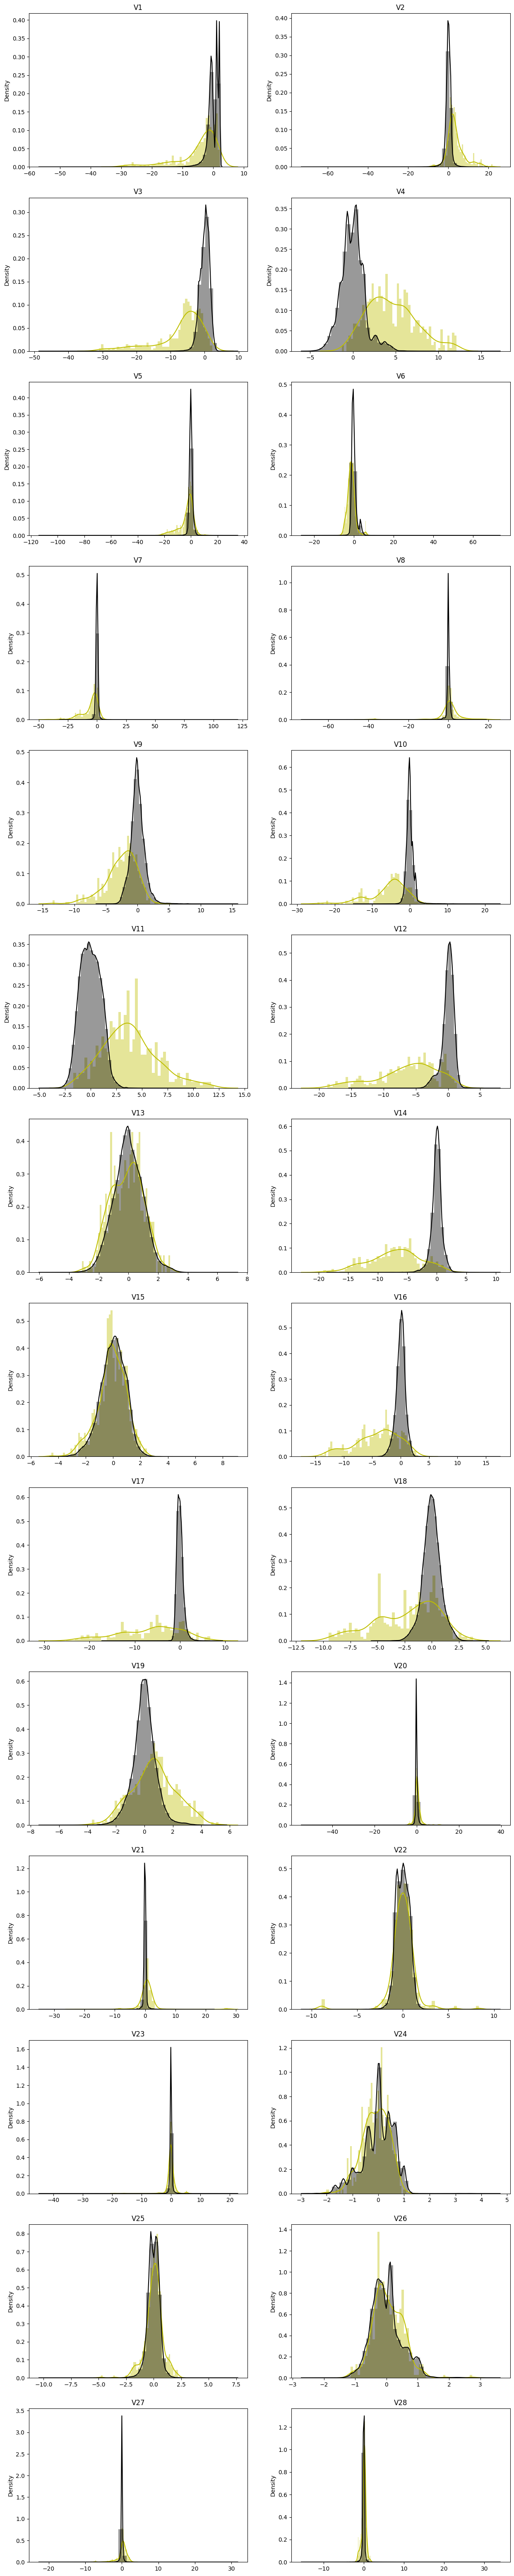

In [43]:
#Feature Density Plot
#We are searching for features that diverges from normal distribuition

import matplotlib.gridspec as gridspec   # to do the grid of plots

#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)  #14 rows and 2 column
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):  #n-index and col-column
    ax = plt.subplot(grid[n]) #for each feature it will create a subplot
    sns.distplot(df[col][frauds], bins = 50, color='y') 
    sns.distplot(df[col][normals], bins = 50, color='black') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

## Correlation Matrix 

<Axes: >

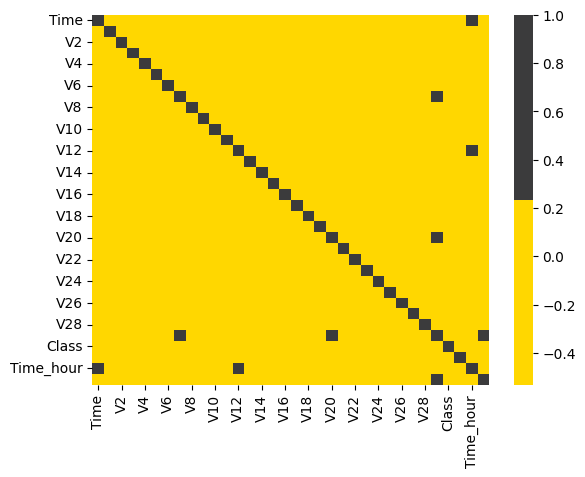

In [16]:
sns.heatmap(df.corr(),cmap = colors,cbar = True)

- There are too many features in the dataset and it is difficult to understand anything.
- Hence, we will plot the correlation map only with the target variable.

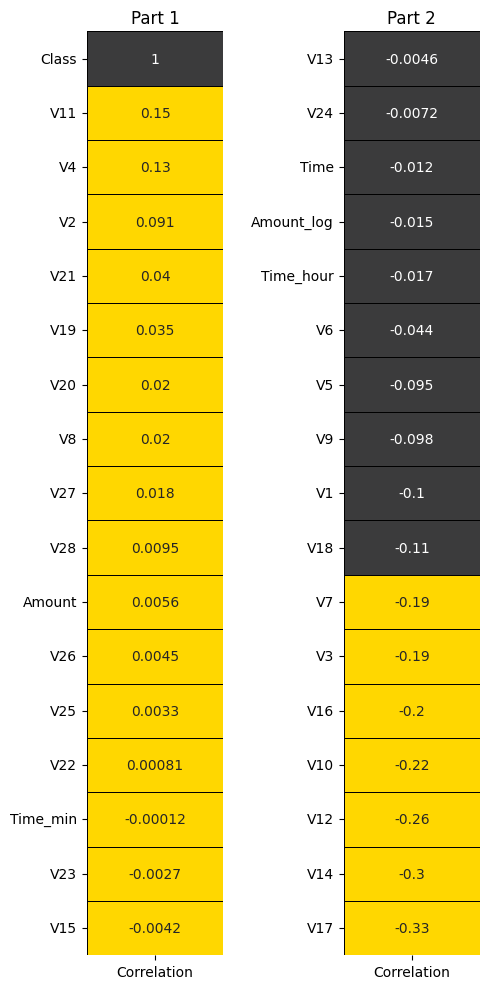

In [17]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:17,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[17:34],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

- For feature selection, we will exclude the features having correlation values between [-0.1,0.1].
- V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the Class feature.

## ANOVA Test :

- SelectKBest is a feature selection method that selects the top k features based on a given score function, and f_classif is one of the score functions available in scikit-learn used specifically for classification tasks, computing the ANOVA F-value between each feature and the target variable.
- Feature selection with ANOVA F-test can help reduce the dimensionality of the feature space by selecting only the most relevant features. This can lead to simpler, more interpretable models and improve computational efficiency.
-  Selecting relevant features with ANOVA F-test can lead to improved model performance by focusing on the most informative features and reducing the noise introduced by irrelevant or redundant features

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

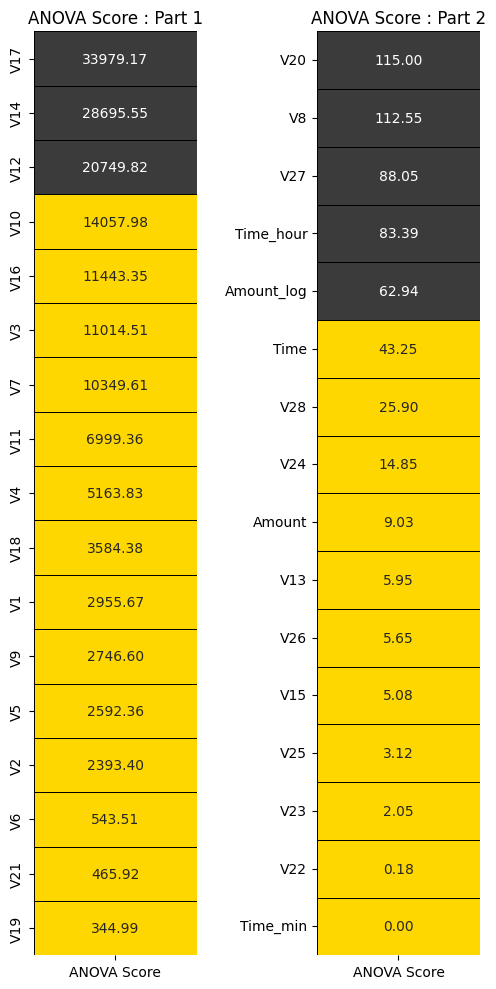

In [19]:
features = df.drop(['Class'], axis=1).loc[:, :'Amount_log']
target = df.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:17,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[17:34],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score.

### Dataset for Model based on Correlation Plot :

In [20]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


### Dataset for Model based on ANOVA Score :


In [21]:
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


## Data Balancing

In order to cope with unbalanced data, there are 2 options :

- Undersampling : Trim down the majority samples of the target variable.
- Oversampling : Increase the minority samples of the target variable to the majority samples.

For best performances, we will use the combination of undersampling and oversampling.

First, we will undersample the majority samples and it is followed by oversampling minority samples.

For data balancing, we will use imblearn.

In [22]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Data Balancing for Model based on Correlation Plot :

In [23]:
# Defining the resampling strategies
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)

# Separating features and target from df1
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

# Applying random undersampling
f_resampled, t_resampled = under.fit_resample(f1, t1)

# Applying SMOTE oversampling
f_resampled, t_resampled = over.fit_resample(f_resampled, t_resampled)

# Count the occurrences of each class after resampling
print(Counter(t_resampled))


Counter({0: 4920, 1: 2460})


### Data Balancing for Model based on ANOVA Score :

In [24]:
# Defining the resampling strategies
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)

# Separating features and target from df1
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

# Applying random undersampling
f_resampled2, t_resampled2 = under.fit_resample(f2, t2)

# Applying SMOTE oversampling
f_resampled2, t_resampled2 = over.fit_resample(f_resampled2, t_resampled2)

# Count the occurrences of each class after resampling
print(Counter(t_resampled2))

Counter({0: 4920, 1: 2460})


##### Calculation for Data Balancing :

Sampling Strategy :  It is a ratio which is the common paramter for oversampling and undersampling.

**Sampling Strategy :** ( Samples of Minority Class ) / ( Samples of Majority Class )

In this case,

- Majority Class : No Fraud Cases : 284315 samples
- Minority Class : Fraud Cases : 492 samples

Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 492 ) / Majority Class Samples
- After undersampling,
    - Majority Class : No Fraud Cases : 4920 samples
    - Minority Class : Fraud Cases : 492 samples
    
Oversampling : Increase the minority class samples

- Sampling_Strategy = 0.5
- 0.5 = ( Minority Class Samples ) / 4920
- After oversampling,
     - Majority Class : No Fraud Cases : 4920 samples
    - Minority Class : Fraud Cases : 2460 samples
    
Final Class Samples :

- **Majority Class :** No Fraud Cases : 4920 samples
- **Minority Class :** Fraud Cases : 2460 samples

- For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
- Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix,ROC-AUC score for model evaluation.


# Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold


In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f_resampled, t_resampled, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f_resampled2, t_resampled2, test_size = 0.20, random_state = 2)

- Splitting the data into 80 - 20 train - test groups

In [27]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
   
 
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Evaluation Metrics :

**Cross-validation Score:** It helps assess the model's ability to generalize to new, unseen data and provides insights into its robustness and reliability. It is essential for detecting overfitting and ensuring that the model's performance is not overly optimistic due to chance. In fraud detection, where the goal is to accurately identify rare instances of fraud, cross-validation helps ensure that the model performs well on unseen fraudulent transactions as well as legitimate ones.

**F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, which is particularly useful when dealing with imbalanced datasets. A high F1-score indicates both high precision and high recall.

**ROC AUC Score:** The Receiver Operating Characteristic Area Under the Curve (ROC AUC) score measures the area under the ROC curve. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. A higher ROC AUC score indicates better performance in distinguishing between fraudulent and legitimate transactions across different thresholds.

## Machine learning algorithm

### Logisitc Regression

- Logistic Regression is simple, interpretable, and computationally efficient. It provides probabilistic outputs, making it easy to interpret the likelihood of a transaction being fraudulent.
- Logistic Regression is often used as a baseline model due to its simplicity and interpretability. It can effectively model the probability of fraud based on features such as transaction amount, time, and merchant information.



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

**Model based on Correlation Plot :**


Cross Validation Score :  98.21%
ROC_AUC Score :  92.60%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



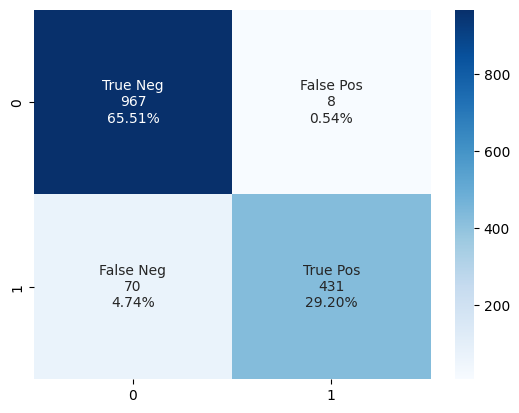

In [30]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

**Model based on ANOVA Score :**


Cross Validation Score :  98.33%
ROC_AUC Score :  92.60%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



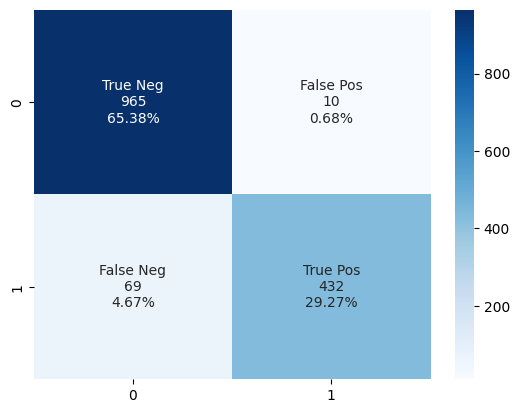

In [31]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### Support Vector Classifier :

- SVCs are effective in high-dimensional spaces and can model complex decision boundaries. They are also robust against overfitting, especially in high-dimensional datasets.
-  SVCs can capture complex patterns in high-dimensional feature spaces, making them suitable for credit card fraud detection tasks where the data may be nonlinearly separable.

In [32]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)

**Model based on Correlation Plot :**


Cross Validation Score :  98.14%
ROC_AUC Score :  92.11%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.85      0.91       501

    accuracy                           0.94      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.94      0.94      1476



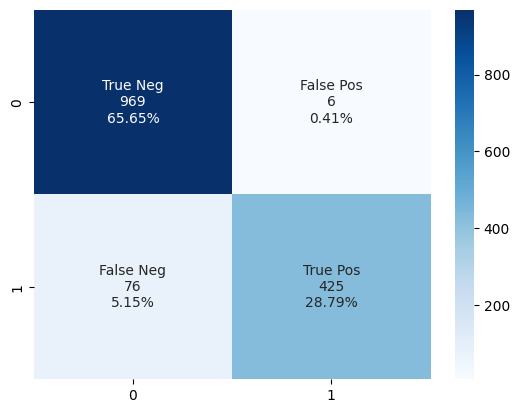

In [33]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

**Model based on ANOVA Score :**


Cross Validation Score :  98.14%
ROC_AUC Score :  92.56%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



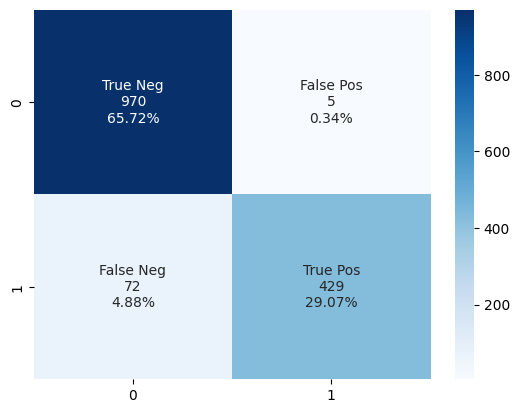

In [34]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### K-Nearest Neighbors :

- KNN is a simple and intuitive algorithm that does not make strong assumptions about the underlying data distribution. It can capture complex decision boundaries.
-  KNN can effectively identify local patterns and anomalies in credit card transactions, making it suitable for detecting irregularities in transaction behavior.


In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

**Model based on Correlation Plot :**


Cross Validation Score :  99.37%
ROC_AUC Score :  98.23%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.96      0.98      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



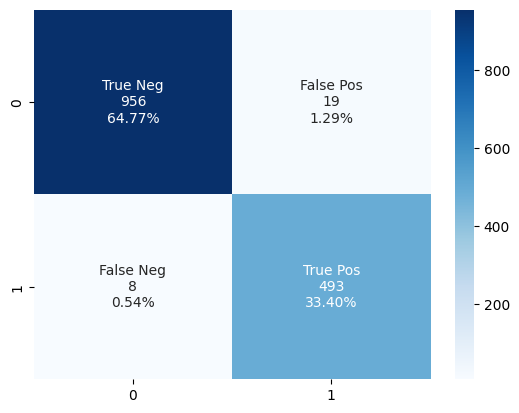

In [36]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

**Model based on ANOVA Score :**


Cross Validation Score :  99.52%
ROC_AUC Score :  98.52%
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       975
           1       0.95      1.00      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.98      0.98      0.98      1476



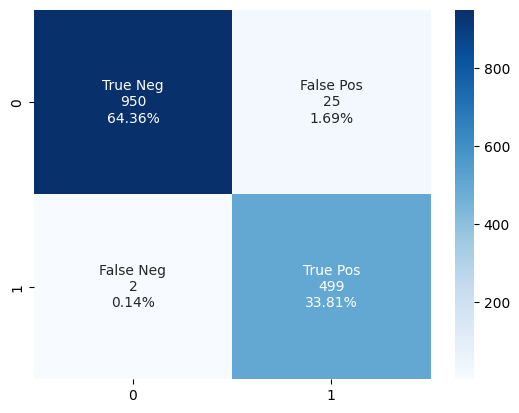

In [37]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

### Decision Tree Classifier :
- Decision Trees are easy to interpret and visualize. They can handle both numerical and categorical data and automatically select important features.
- Decision Trees can capture nonlinear relationships between features and target labels, making them suitable for detecting fraudulent patterns in credit card transactions.

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)



**Model based on Correlation Plot :**

Cross Validation Score :  96.41%
ROC_AUC Score :  94.04%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       975
           1       0.97      0.90      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.95      0.95      1476



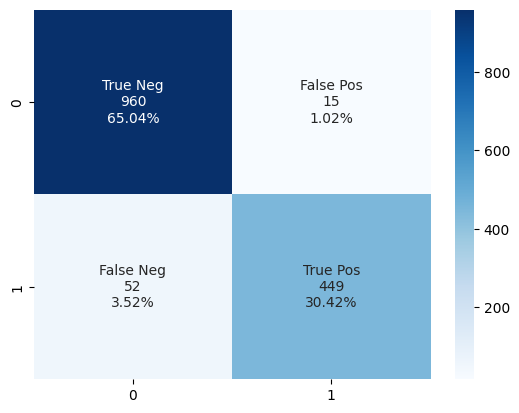

In [39]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

**Model based on ANOVA Score :**


Cross Validation Score :  96.56%
ROC_AUC Score :  91.81%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.84      0.91       501

    accuracy                           0.94      1476
   macro avg       0.95      0.92      0.93      1476
weighted avg       0.94      0.94      0.94      1476



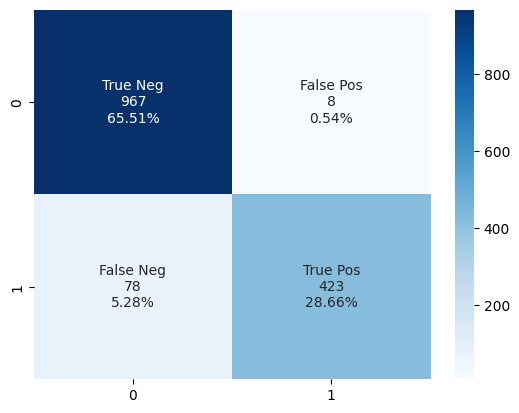

In [40]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### Random Forest Classifier :
- Random Forest is an ensemble of Decision Trees, which reduces overfitting and improves generalization performance. It provides feature importance measures and is robust to noisy data.
- Random Forest combines the strengths of Decision Trees with ensemble learning, making it effective for capturing complex fraud patterns while mitigating overfitting.

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

**Model based on Correlation Plot :**


Cross Validation Score :  98.12%
ROC_AUC Score :  92.51%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.85      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



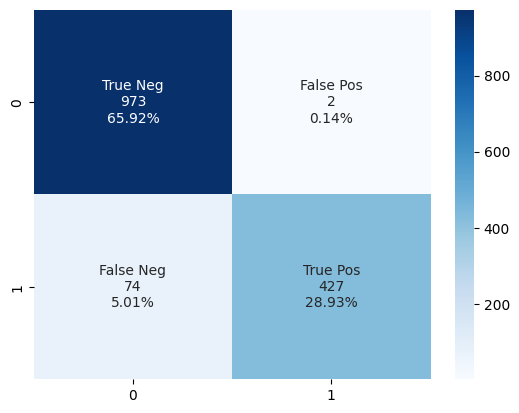

In [45]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

**Model based on ANOVA Score :**


Cross Validation Score :  97.86%
ROC_AUC Score :  92.02%
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       975
           1       1.00      0.84      0.91       501

    accuracy                           0.95      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.95      0.94      1476



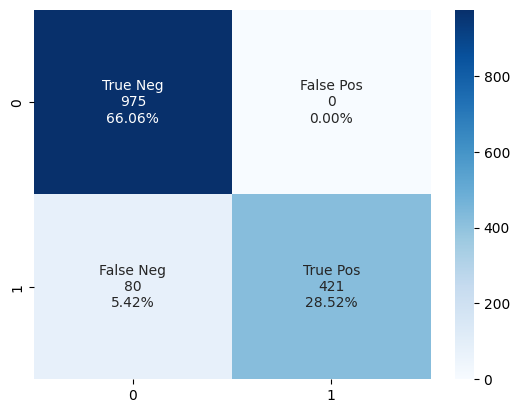

In [46]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

## ML Alogrithm Results Table :

Results Table for models based on Correlation Plot :

In [54]:
from tabulate import tabulate
# Creating a list of tuples with the data
results = [
    ('Logistic Regression', "98.21%", "92.60%", "92%"),
    ('SVC', "98.14%", "92.10%", "91%"),
    ('KNN', "99.37%", "92.11%", "97%"),
    ('Decision Tree', "96.41%", "94.04%", "93%"),
    ('Random Forest', "98.12%", "92.51%", "92%")
]

results_df = pd.DataFrame(results, columns=['Algorithm', 'Cross Validation Score', 'ROC AUC Score', 'F1-score(fraud)'])

results_df.insert(0, "Sr. No.", range(1, len(results_df) + 1))

results_df.set_index("Sr. No.", inplace=True)
table = tabulate(results_df, headers='keys', tablefmt='grid')


print(table)


+-----------+---------------------+--------------------------+-----------------+-------------------+
|   Sr. No. | Algorithm           | Cross Validation Score   | ROC AUC Score   | F1-score(fraud)   |
+===========+=====================+==========================+=================+===================+
|         1 | Logistic Regression | 98.21%                   | 92.60%          | 92%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         2 | SVC                 | 98.14%                   | 92.10%          | 91%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         3 | KNN                 | 99.37%                   | 92.11%          | 97%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         4 | Decision Tree       | 96.41%                   | 94.04%          | 93%       

**Insights**
- The K-Nearest Neighbors (KNN) algorithm achieved the highest cross-validation score of 99.37%, indicating strong performance in predicting the target variable.
- Despite its high cross-validation score, KNN had slightly lower ROC AUC and F1-score for detecting fraud compared to other algorithms.
- Decision Tree performed well in terms of both ROC AUC score (94.04%) and F1-score (93%) for fraud detection.
- Random Forest and Logistic Regression also demonstrated competitive performance across all metrics.

Results Table for models based on ANOVA Score :

In [53]:
from tabulate import tabulate
# Creating a list of tuples with the data
results = [
    ('Logistic Regression', "98.33%", "92.60%", "92%"),
    ('SVC', "98.14%", "92.56%", "92%"),
    ('KNN', "99.52%", "98.52%", "97%"),
    ('Decision Tree', "96.56%", "91.81%", "91%"),
    ('Random Forest', "97.86%", "92.02%", "91%")
]

results_df = pd.DataFrame(results, columns=['Algorithm', 'Cross Validation Score', 'ROC AUC Score', 'F1-score(fraud)'])

results_df.insert(0, "Sr. No.", range(1, len(results_df) + 1))

results_df.set_index("Sr. No.", inplace=True)

table = tabulate(results_df, headers='keys', tablefmt='grid')


print(table)

+-----------+---------------------+--------------------------+-----------------+-------------------+
|   Sr. No. | Algorithm           | Cross Validation Score   | ROC AUC Score   | F1-score(fraud)   |
+===========+=====================+==========================+=================+===================+
|         1 | Logistic Regression | 98.33%                   | 92.60%          | 92%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         2 | SVC                 | 98.14%                   | 92.56%          | 92%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         3 | KNN                 | 99.52%                   | 98.52%          | 97%               |
+-----------+---------------------+--------------------------+-----------------+-------------------+
|         4 | Decision Tree       | 96.56%                   | 91.81%          | 91%       

**Insights**
- K-Nearest Neighbors (KNN) stands out: KNN achieved the highest cross-validation score of 99.52%, indicating strong predictive performance. Additionally, it has the highest ROC AUC score (98.52%) among all algorithms, suggesting that it's effective in distinguishing between positive and negative classes. This makes KNN a promising choice for fraud detection tasks.
-  Both Logistic Regression and Support Vector Classifier (SVC) have similar F1-scores (92%) for detecting fraud. This indicates that they achieve a good balance between precision and recall. While KNN has a higher F1-score (97%), it's essential to consider its overall performance across different metrics.
-  Decision Tree and Random Forest classifiers have lower cross-validation scores compared to KNN, Logistic Regression, and SVC. However, they still perform reasonably well, with F1-scores of 91% for fraud detection. It's worth noting that Decision Tree and Random Forest models might be more interpretable compared to some other algorithms.
- While KNN exhibits the highest performance based on cross-validation and ROC AUC score, it's essential to consider other factors such as computational efficiency, interpretability, and potential overfitting. Logistic Regression and SVC offer a good balance between performance and interpretability. Random Forest and Decision Tree models provide alternative options, especially if interpretability is a priority.

## Anomaly Detection Algorithms

Anomaly detection algorithms are used to identify patterns or instances that deviate from normal behavior within a dataset. These anomalies, also known as outliers or novelties, can represent critical information such as fraudulent transactions, equipment malfunctions, or cybersecurity threats. Here are some commonly used anomaly detection algorithms

**Isolation Forest Algorithm:** One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

**Local Outlier Factor(LOF) Algorithm:** The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

### Isolation Forest

**Model based on Correlation Plot :**

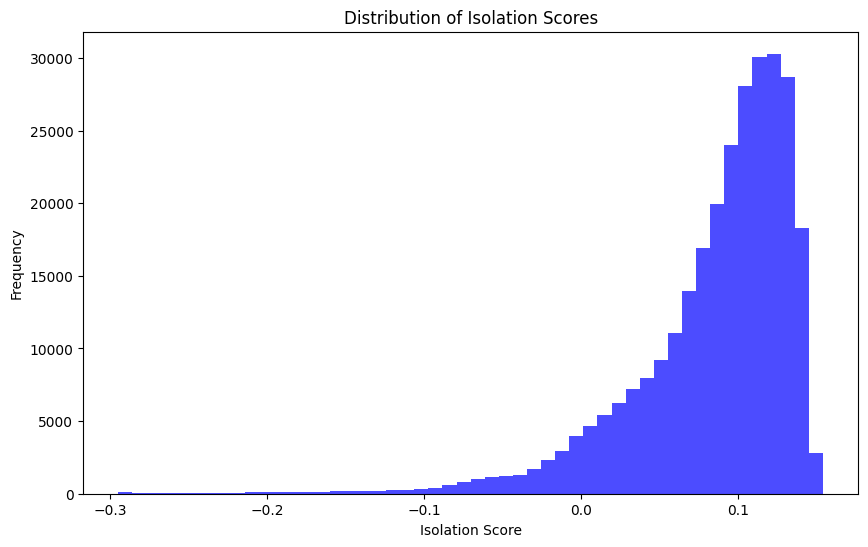

Number of errors: 19064
Accuracy Score: 0.9330634429631294

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    284315
           1       0.02      0.89      0.04       492

    accuracy                           0.93    284807
   macro avg       0.51      0.91      0.50    284807
weighted avg       1.00      0.93      0.96    284807


Confusion Matrix:


<Axes: >

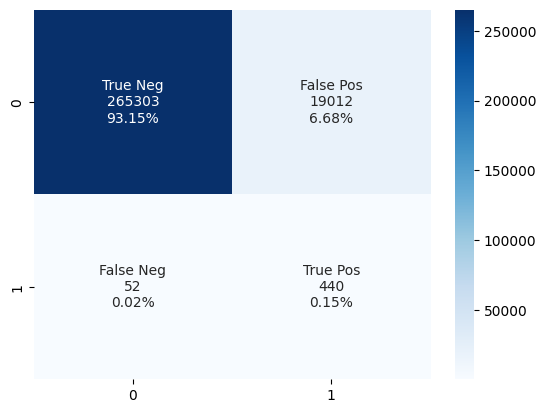

In [88]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df1.iloc[:,:9].values
Y = df1.iloc[:,9].values

# Fitting the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
clf.fit(X)

# Computing the isolation scores for each data point
isolation_scores = clf.decision_function(X)

y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0  # Set inliers to 0 (valid transactions)
y_pred[y_pred == -1] = 1 # Set outliers to 1 (fraudulent transactions)

# Calculating number of errors
n_errors = (y_pred != Y).sum()

# Visualizing the distribution of isolation scores
plt.figure(figsize=(10, 6))
plt.hist(isolation_scores, bins=50, color='blue', alpha=0.7)
plt.xlabel('Isolation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Isolation Scores')
plt.show()

# Predicting outliers (fraudulent transactions)
predictions = clf.predict(X)
predictions[predictions == 1] = 0  # Marking inliers as 0
predictions[predictions == -1] = 1  # Marking outliers (fraud) as 1

# Evaluating the model
print("Number of errors:", n_errors)
print("Accuracy Score:", accuracy_score(Y, predictions))


print("\nClassification Report:")
print(classification_report(Y, predictions))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y, predictions)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')



**Model based on ANOVA Score :**

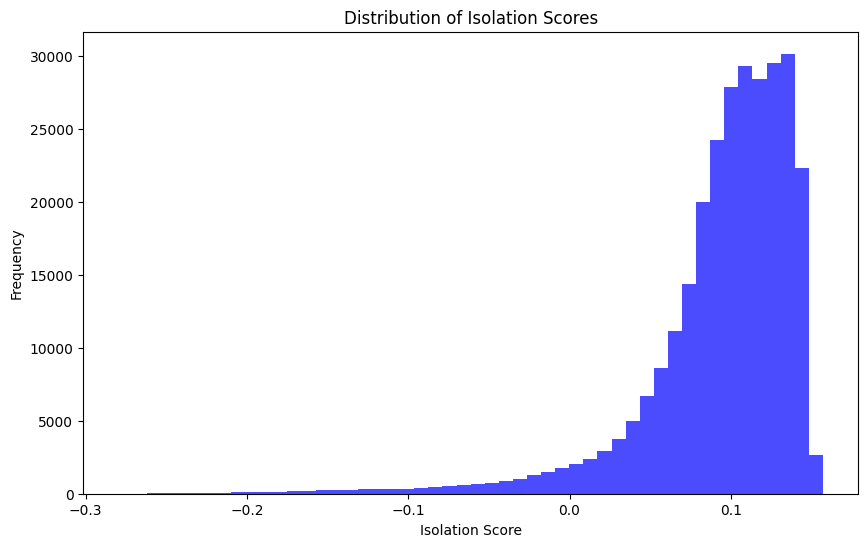

Number of errors: 12884
Accuracy Score: 0.9547623478355518

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    284315
           1       0.03      0.88      0.06       492

    accuracy                           0.95    284807
   macro avg       0.52      0.92      0.52    284807
weighted avg       1.00      0.95      0.98    284807


Confusion Matrix:


<Axes: >

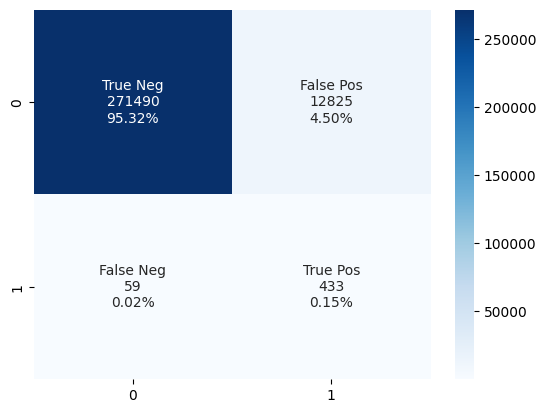

In [87]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df2.iloc[:,:20].values
Y = df2.iloc[:,20].values

# Fitting the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
clf.fit(X)

# Computing the isolation scores for each data point
isolation_scores = clf.decision_function(X)

y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0  # Set inliers to 0 (valid transactions)
y_pred[y_pred == -1] = 1 # Set outliers to 1 (fraudulent transactions)

# Calculating number of errors
n_errors = (y_pred != Y).sum()

# Visualizing the distribution of isolation scores
plt.figure(figsize=(10, 6))
plt.hist(isolation_scores, bins=50, color='blue', alpha=0.7)
plt.xlabel('Isolation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Isolation Scores')
plt.show()

# Predicting outliers (fraudulent transactions)
predictions = clf.predict(X)
predictions[predictions == 1] = 0  # Marking inliers as 0
predictions[predictions == -1] = 1  # Marking outliers (fraud) as 1

# Evaluating the model
print("Number of errors:", n_errors)
print("Accuracy Score:", accuracy_score(Y, predictions))


print("\nClassification Report:")
print(classification_report(Y, predictions))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y, predictions)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')



### Local Outlier Factor (LOF) :

**Model based on Correlation Plot :**

Number of errors: 20102
Accuracy Score: 0.9294188696204798
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    284315
           1       0.00      0.07      0.00       492

    accuracy                           0.93    284807
   macro avg       0.50      0.50      0.48    284807
weighted avg       1.00      0.93      0.96    284807


Confusion Matrix:


<Axes: >

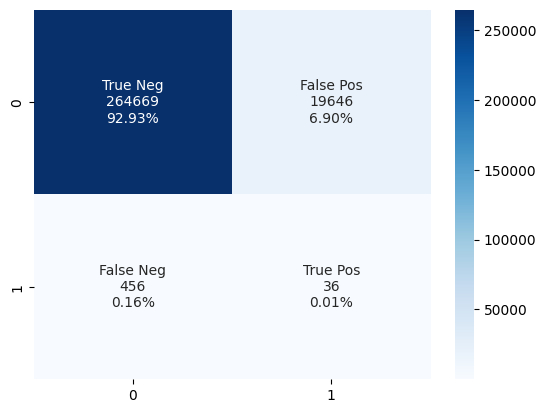

In [83]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df1.iloc[:,:9].values
Y = df1.iloc[:,9].values


# Initializing and fitting the Local Outlier Factor model
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(X)

# Calculating anomaly scores (negative LOF scores)
anomaly_scores = -clf.negative_outlier_factor_

# Converting predictions (-1: outlier, 1: inlier) to labels (0: valid transactions, 1: fraud)
y_pred[y_pred == 1] = 0  # Set inliers to 0 (valid transactions)
y_pred[y_pred == -1] = 1 # Set outliers to 1 (fraudulent transactions)

# Calculating number of errors
n_errors = (y_pred != Y).sum()

# Printing classification report and accuracy score
print("Number of errors:", n_errors)
print("Accuracy Score:", accuracy_score(Y, y_pred))
print("Classification Report:")
print(classification_report(Y, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y,y_pred )
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')





**Model based on ANOVA Score :**

Number of errors: 17621
Accuracy Score: 0.9381300319163504
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.00      0.12      0.01       492

    accuracy                           0.94    284807
   macro avg       0.50      0.53      0.49    284807
weighted avg       1.00      0.94      0.97    284807


Confusion Matrix:


<Axes: >

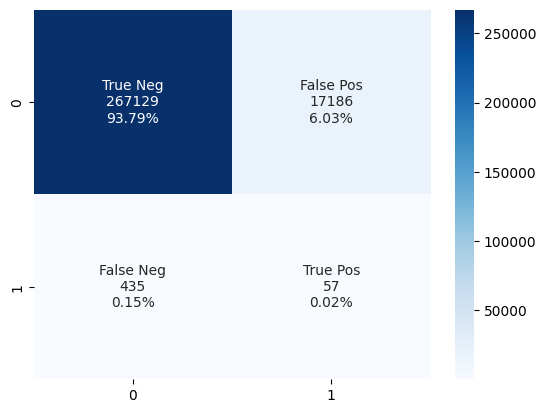

In [85]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df2.iloc[:,:20].values
Y = df2.iloc[:,20].values

# Initializing and fitting the Local Outlier Factor model
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(X)

# Calculating anomaly scores (negative LOF scores)
anomaly_scores = -clf.negative_outlier_factor_

# Converting predictions (-1: outlier, 1: inlier) to labels (0: valid transactions, 1: fraud)
y_pred[y_pred == 1] = 0  # Set inliers to 0 (valid transactions)
y_pred[y_pred == -1] = 1 # Set outliers to 1 (fraudulent transactions)

# Calculating number of errors
n_errors = (y_pred != Y).sum()

# Printing classification report and accuracy score
print("Number of errors:", n_errors)
print("Accuracy Score:", accuracy_score(Y, y_pred))
print("Classification Report:")
print(classification_report(Y, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y,y_pred )
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


### Anomaly Detection Results Table :

Results Table for models based on Correlation Plot :

In [91]:
from tabulate import tabulate
# Creating a list of tuples with the data
results = [
    ('Isolation Forest', "19064", "93.30%","0.02%","0.89%"),
    ('LOF', "20102", "92.94%","0.00%","0.07%")
]

results_df = pd.DataFrame(results, columns=['Algorithm', 'No. Of Errors', 'Accuracy Score','Precision(fraud)','Recall(fraud)'])

results_df.insert(0, "Sr. No.", range(1, len(results_df) + 1))

results_df.set_index("Sr. No.", inplace=True)
table = tabulate(results_df, headers='keys', tablefmt='grid')


print(table)

+-----------+------------------+-----------------+------------------+--------------------+-----------------+
|   Sr. No. | Algorithm        |   No. Of Errors | Accuracy Score   | Precision(fraud)   | Recall(fraud)   |
+===========+==================+=================+==================+====================+=================+
|         1 | Isolation Forest |           19064 | 93.30%           | 0.02%              | 0.89%           |
+-----------+------------------+-----------------+------------------+--------------------+-----------------+
|         2 | LOF              |           20102 | 92.94%           | 0.00%              | 0.07%           |
+-----------+------------------+-----------------+------------------+--------------------+-----------------+


**Insights**
- Isolation Forest has fewer errors compared to LOF, with 19,064 errors compared to 20,102 errors. This indicates that Isolation Forest performs slightly better in terms of accurately identifying fraudulent transactions. 
- Isolation Forest outperforms LOF in terms of overall accuracy and recall, suggesting that it may be more effective in identifying true instances of fraud while maintaining a reasonable accuracy rate.
- Both algorithms have very low precision for detecting fraudulent transactions, indicating a high number of false alarms. This could be due to the imbalance between normal and fraudulent transactions in the dataset, as well as the inherent difficulty of accurately detecting fraud.

Results Table for models based on ANOVA Score :

In [92]:
from tabulate import tabulate
# Creating a list of tuples with the data
results = [
    ('Isolation Forest', "12884", "95.47%","0.03%","0.88%"),
    ('LOF', "17621", "93.81%","0.00%","0.12%")
]

results_df = pd.DataFrame(results, columns=['Algorithm', 'No. Of Errors', 'Accuracy Score','Precision(fraud)','Recall(fraud)'])

results_df.insert(0, "Sr. No.", range(1, len(results_df) + 1))

results_df.set_index("Sr. No.", inplace=True)
table = tabulate(results_df, headers='keys', tablefmt='grid')


print(table)

+-----------+------------------+-----------------+------------------+--------------------+-----------------+
|   Sr. No. | Algorithm        |   No. Of Errors | Accuracy Score   | Precision(fraud)   | Recall(fraud)   |
+===========+==================+=================+==================+====================+=================+
|         1 | Isolation Forest |           12884 | 95.47%           | 0.03%              | 0.88%           |
+-----------+------------------+-----------------+------------------+--------------------+-----------------+
|         2 | LOF              |           17621 | 93.81%           | 0.00%              | 0.12%           |
+-----------+------------------+-----------------+------------------+--------------------+-----------------+


**Insights**
- Isolation Forest has fewer errors compared to LOF, with 12,884 errors compared to 17,621 errors. This indicates that Isolation Forest performs better in terms of accurately identifying fraudulent transactions.
- Isolation Forest significantly outperforms LOF in terms of accuracy, precision, and recall. This suggests that Isolation Forest is more effective in accurately identifying both normal and fraudulent transactions.


**Discuss the challenges and considerations in implementing fraud detection models in real-time payment processing systems.** 

Implementing fraud detection models in real-time payment processing systems poses several challenges and requires careful considerations due to the dynamic and time-sensitive nature of transactions. Here are some key challenges and considerations:

**Real-time Processing:** Real-time fraud detection systems must process transactions quickly to prevent fraudulent activities from occurring. This requires efficient algorithms and infrastructure capable of handling large volumes of data in real-time.

**Scalability:** As transaction volumes can vary significantly, especially during peak times, fraud detection systems must be scalable to accommodate fluctuations in workload. Scalability ensures that the system can handle increased transaction volumes without sacrificing performance.

**Accuracy vs Speed:** Balancing accuracy with speed is crucial in real-time fraud detection. While it's essential to detect fraudulent transactions accurately, delays in processing can result in missed opportunities to prevent fraud. Therefore, algorithms must strike the right balance between accuracy and speed.

**Feature Engineering:** Identifying relevant features for fraud detection in real-time can be challenging, especially when dealing with large and diverse datasets. Feature engineering plays a crucial role in extracting meaningful insights from transaction data and identifying potential fraud indicators

# Conclusion

- This is a great dataset to learn about binary classification problem with unbalanced data.
- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.
- Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.
- Several machine learning algorithms and techniques are commonly used for credit card fraud detection, including logistic regression, support vector machines (SVM), k-nearest neighbors (KNN), decision trees, random forests, isolation forests, and local outlier factor (LOF).
- Each algorithm has its strengths and weaknesses, and the choice depends on factors such as dataset characteristics, interpretability, computational efficiency, and performance metrics.
- Evaluation metrics play a crucial role in assessing the performance of fraud detection models. Common metrics include CV Score, F1-score, ROC AUC score, and confusion matrix. These metrics provide insights into the model's ability to correctly classify normal and fraudulent transactions, minimize false positives and false negatives, and overall effectiveness in fraud detection.
- 


# Future Directions

The research highlights the importance of ongoing research and innovation in the field of credit card fraud detection. Future directions may include exploring advanced machine learning techniques, such as deep learning and reinforcement learning, integrating behavioral analytics and biometric authentication, leveraging blockchain technology for secure transactions, and enhancing collaboration between academia, industry, and regulatory bodies to address emerging challenges and threats in fraud detection.

# References :

- https://www.chargebackgurus.com/blog/credit-card-fraud-detection
- https://www.cnbc.com/select/what-is-a-credit-card/
- https://www.bajajfinserv.in/credit-card-fraud-in-india
- https://www.fortunebusinessinsights.com/industry-reports/fraud-detection-and-prevention-market-100231